In [2]:
!pip install pandas matplotlib statsmodels openpyxl

In [3]:
import pandas as pd

# Cargar el archivo de Excel
data = pd.read_excel(r'C:\Users\Juan Cabrera\Documents\ventasmensuales.xlsx')

# Convertir la columna 'Fechas' a formato datetime y establecer como índice
data['Fechas'] = pd.to_datetime(data['Fechas'])
data.set_index('Fechas', inplace=True)

# Mostrar los primeros datos
print(data.head())


            Ingresos
Fechas              
2019-01-01  28946.18
2019-02-01  25698.19
2019-03-01  45359.17
2019-04-01  29133.05
2019-05-01  33313.01


In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Cargar los datos y especificar la frecuencia manualmente
data = pd.read_excel(r'C:\Users\Juan Cabrera\Documents\ventasmensuales.xlsx')

# Convertir la columna 'Fechas' en formato datetime y establecerla como índice
data['Fechas'] = pd.to_datetime(data['Fechas'])
data.set_index('Fechas', inplace=True)

# Especificar la frecuencia 'MS' (inicio de mes)
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='MS')

# Verificar que los datos tienen la frecuencia correcta
print(data.head())

# Ajustar el modelo SARIMA (con estacionalidad)
model = SARIMAX(data['Ingresos'],
                order=(1, 1, 0),  # Parámetros ARIMA (p, d, q)
                seasonal_order=(1, 1, 0, 12))  # Parámetros estacionales (P, D, Q, S)
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())



            Ingresos
2019-01-01  28946.18
2019-02-01  25698.19
2019-03-01  45359.17
2019-04-01  29133.05
2019-05-01  33313.01
                                     SARIMAX Results                                      
Dep. Variable:                           Ingresos   No. Observations:                   68
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -594.417
Date:                            Sun, 10 Nov 2024   AIC                           1194.834
Time:                                    21:22:52   BIC                           1200.856
Sample:                                01-01-2019   HQIC                          1197.163
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

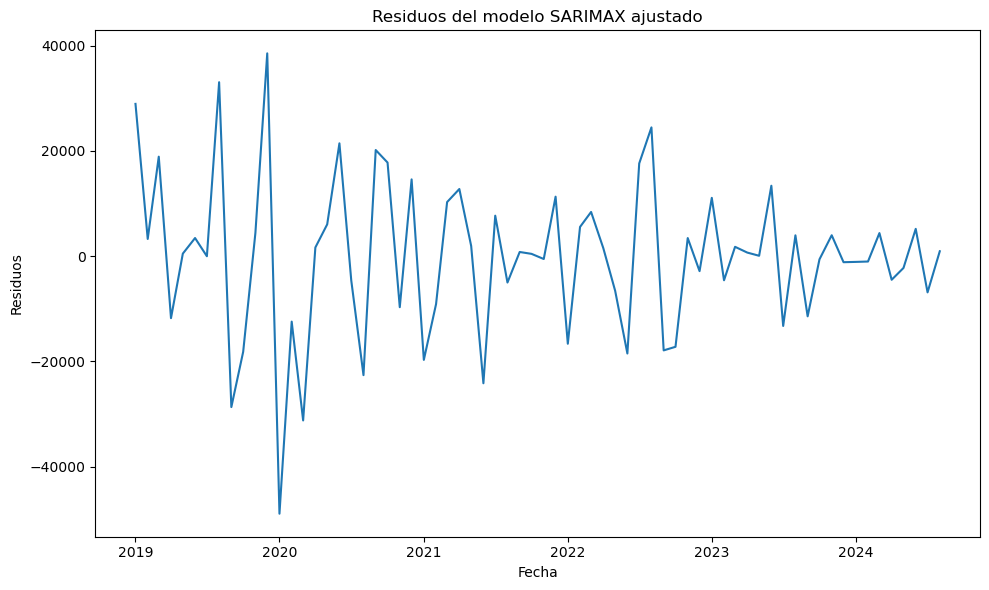

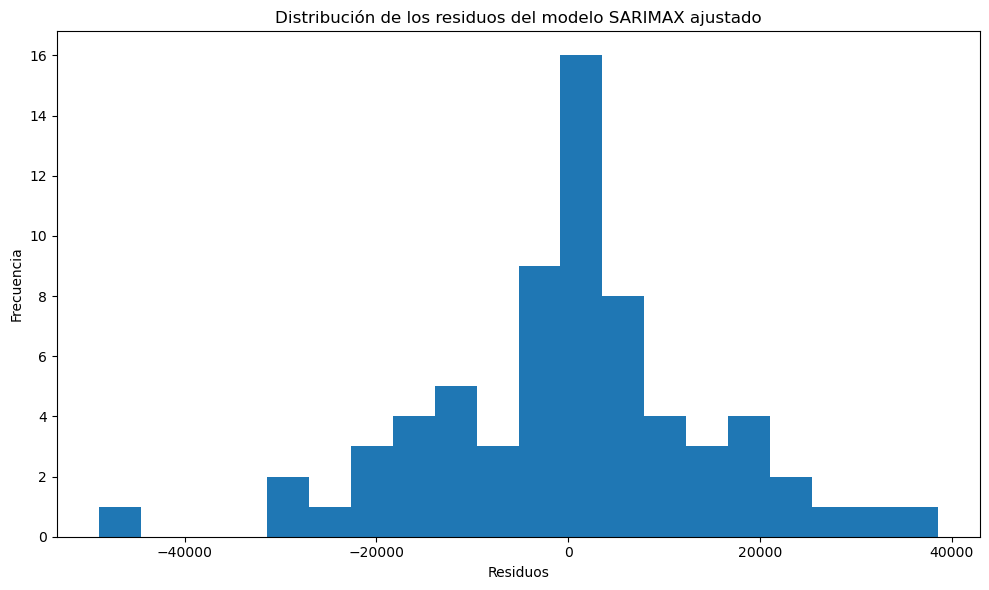

In [5]:
# Graficar los residuos del modelo ajustado
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX ajustado')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()

# Graficar la distribución de los residuos (histograma)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Distribución de los residuos del modelo SARIMAX ajustado')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


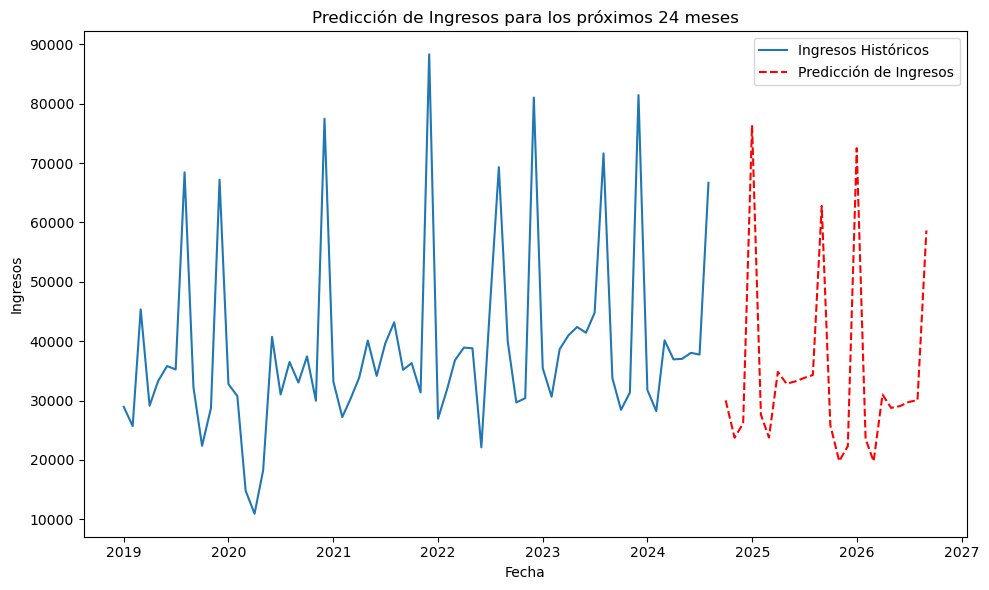

In [6]:
# Predecir los ingresos futuros para los próximos 24 meses
forecast = model_fit.forecast(steps=24)

# Crear un rango de fechas futuras para las predicciones
fechas_futuras = pd.date_range(start=data.index[-1], periods=25, freq='ME')[1:]

# Graficar los ingresos históricos
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ingresos'], label='Ingresos Históricos')

# Graficar las predicciones futuras
plt.plot(fechas_futuras, forecast, label='Predicción de Ingresos', color='red', linestyle='--')

# Añadir título y etiquetas de los ejes
plt.title('Predicción de Ingresos para los próximos 24 meses')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')

# Mostrar la leyenda y el gráfico
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Crear un DataFrame para mostrar las predicciones con las fechas
predicciones_df = pd.DataFrame({'Fecha': fechas_futuras, 'Predicción de Ingresos': forecast})

# Mostrar las primeras filas de la tabla de predicciones
print(predicciones_df.head(24))  # Muestra las predicciones de los 24 meses futuros


                Fecha  Predicción de Ingresos
2024-09-01 2024-09-30            30034.814059
2024-10-01 2024-10-31            23753.185417
2024-11-01 2024-11-30            26158.572507
2024-12-01 2024-12-31            76377.747964
2025-01-01 2025-01-31            27610.458550
2025-02-01 2025-02-28            23766.657717
2025-03-01 2025-03-31            34836.519486
2025-04-01 2025-04-30            32847.271197
2025-05-01 2025-05-31            33222.891939
2025-06-01 2025-06-30            33799.505803
2025-07-01 2025-07-31            34311.839023
2025-08-01 2025-08-31            62779.332020
2025-09-01 2025-09-30            25875.149371
2025-10-01 2025-10-31            19797.833853
2025-11-01 2025-11-30            22316.012305
2025-12-01 2025-12-31            72507.934983
2026-01-01 2026-01-31            23543.688129
2026-02-01 2026-02-28            19760.615380
2026-03-01 2026-03-31            31019.507894
2026-04-01 2026-04-30            28762.328089
2026-05-01 2026-05-31            2

In [8]:
# Estadísticas descriptivas de los ingresos históricos
print("Estadísticas descriptivas de los ingresos históricos:")
print(data['Ingresos'].describe())

# Estadísticas descriptivas de las predicciones futuras
print("\nEstadísticas descriptivas de las predicciones de ingresos:")
print(predicciones_df['Predicción de Ingresos'].describe())


Estadísticas descriptivas de los ingresos históricos:
count       68.000000
mean     38942.432647
std      15694.692875
min      10937.330000
25%      30583.310000
50%      35360.030000
75%      40295.325000
max      88319.240000
Name: Ingresos, dtype: float64

Estadísticas descriptivas de las predicciones de ingresos:
count       24.000000
mean     34609.968347
std      15943.594346
min      19760.615380
25%      25348.026458
50%      29890.991901
75%      33927.589108
max      76377.747964
Name: Predicción de Ingresos, dtype: float64


In [9]:
# Calcular el error absoluto medio (MAE) y el error cuadrático medio (RMSE) de los residuos
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data['Ingresos'], model_fit.fittedvalues)
rmse = np.sqrt(mean_squared_error(data['Ingresos'], model_fit.fittedvalues))

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (RMSE): {rmse}")


Error Absoluto Medio (MAE): 10845.039547334265
Error Cuadrático Medio (RMSE): 15014.020439295384


Prueba de Dickey-Fuller Aumentada (ADF):
Valor ADF: -0.7575891013152682
Valor p: 0.831263726824604
Número de retardos utilizados: 11
Número de observaciones: 56
Valores críticos:
   1%: -3.552928203580539
   5%: -2.9147306250000002
   10%: -2.595137155612245
La serie no es estacionaria (no rechazamos la hipótesis nula).


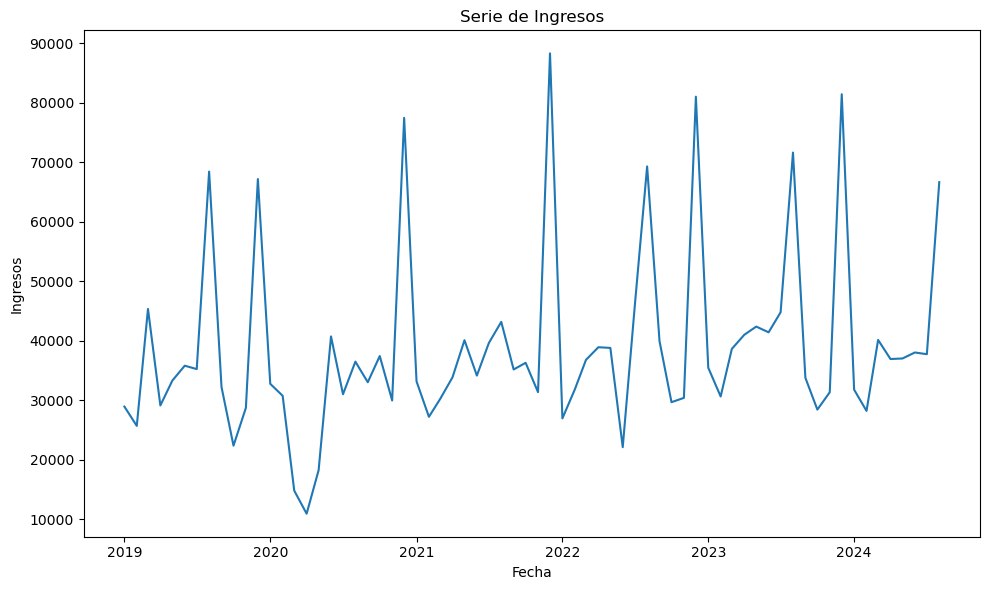

In [21]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Realizar la prueba de Dickey-Fuller Aumentada (ADF)
resultado_adf = adfuller(data['Ingresos'])  # Reemplaza 'Ingresos' con el nombre de tu columna si es diferente

# Imprimir los resultados de la prueba ADF
print("Prueba de Dickey-Fuller Aumentada (ADF):")
print(f"Valor ADF: {resultado_adf[0]}")
print(f"Valor p: {resultado_adf[1]}")
print("Número de retardos utilizados:", resultado_adf[2])
print("Número de observaciones:", resultado_adf[3])
print("Valores críticos:")
for key, value in resultado_adf[4].items():
    print(f"   {key}: {value}")

# Interpretación del resultado
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie no es estacionaria (no rechazamos la hipótesis nula).")

# Visualización de la serie temporal para observar tendencias o estacionalidad
plt.figure(figsize=(10, 6))
plt.plot(data['Ingresos'])
plt.title('Serie de Ingresos')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Crear el modelo ARIMA simple
model_arima = ARIMA(data['Ingresos'], order=(1, 1, 1))  # Cambia el orden según sea necesario
model_arima_fit = model_arima.fit()

# Realizar las predicciones con el modelo ARIMA simple
forecast_arima = model_arima_fit.forecast(steps=24)

# Calcular los errores para el modelo ARIMA simple
mae_arima = mean_absolute_error(data['Ingresos'], model_arima_fit.fittedvalues)
rmse_arima = np.sqrt(mean_squared_error(data['Ingresos'], model_arima_fit.fittedvalues))

print("Resultados del modelo ARIMA simple:")
print(model_arima_fit.summary())
print(f"Error Absoluto Medio (MAE) ARIMA: {mae_arima}")
print(f"Error Cuadrático Medio (RMSE) ARIMA: {rmse_arima}")


Resultados del modelo ARIMA simple:
                               SARIMAX Results                                
Dep. Variable:               Ingresos   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -745.493
Date:                Sun, 10 Nov 2024   AIC                           1496.985
Time:                        21:27:03   BIC                           1503.600
Sample:                    01-01-2019   HQIC                          1499.603
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0508      0.234     -0.217      0.828      -0.509       0.407
ma.L1         -0.9381      0.081    -11.619      0.000      -1.096      -0.780
sigma2      2.84

C:\Users\Juan Cabrera\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


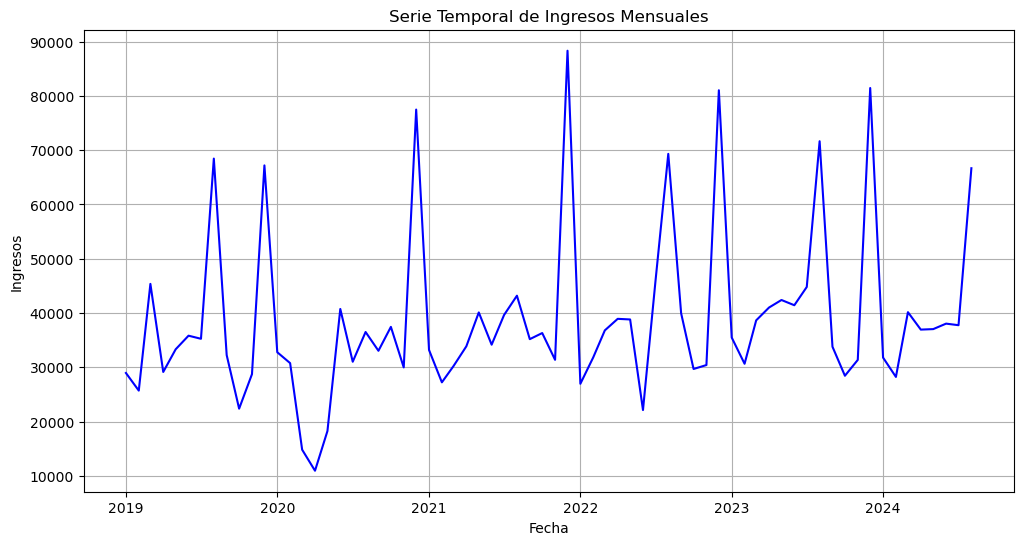

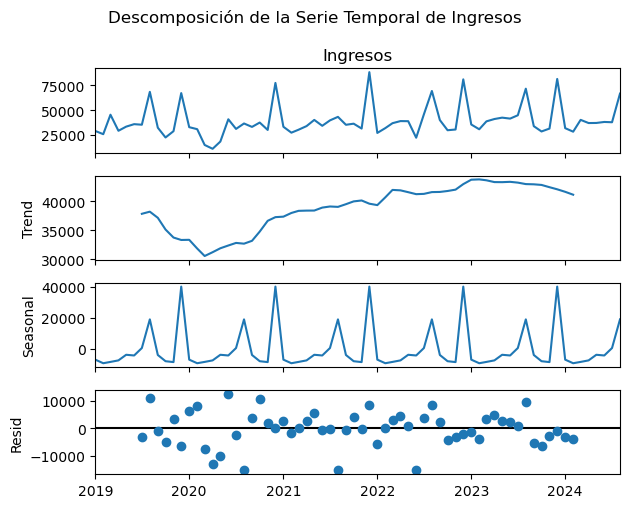

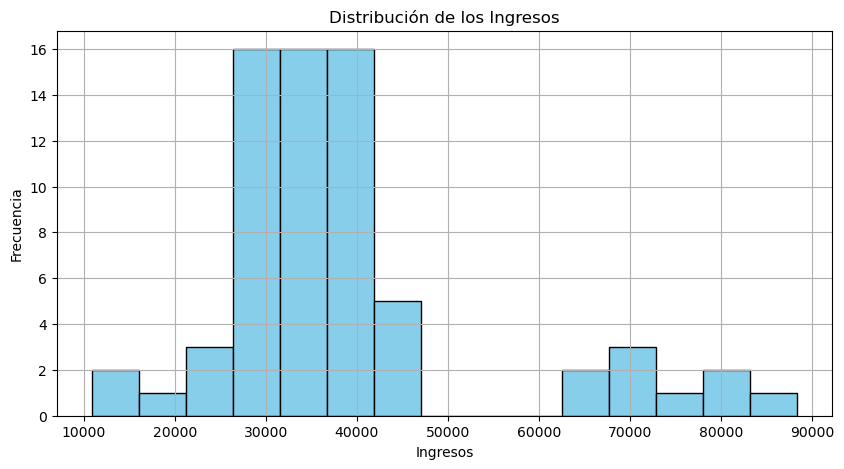

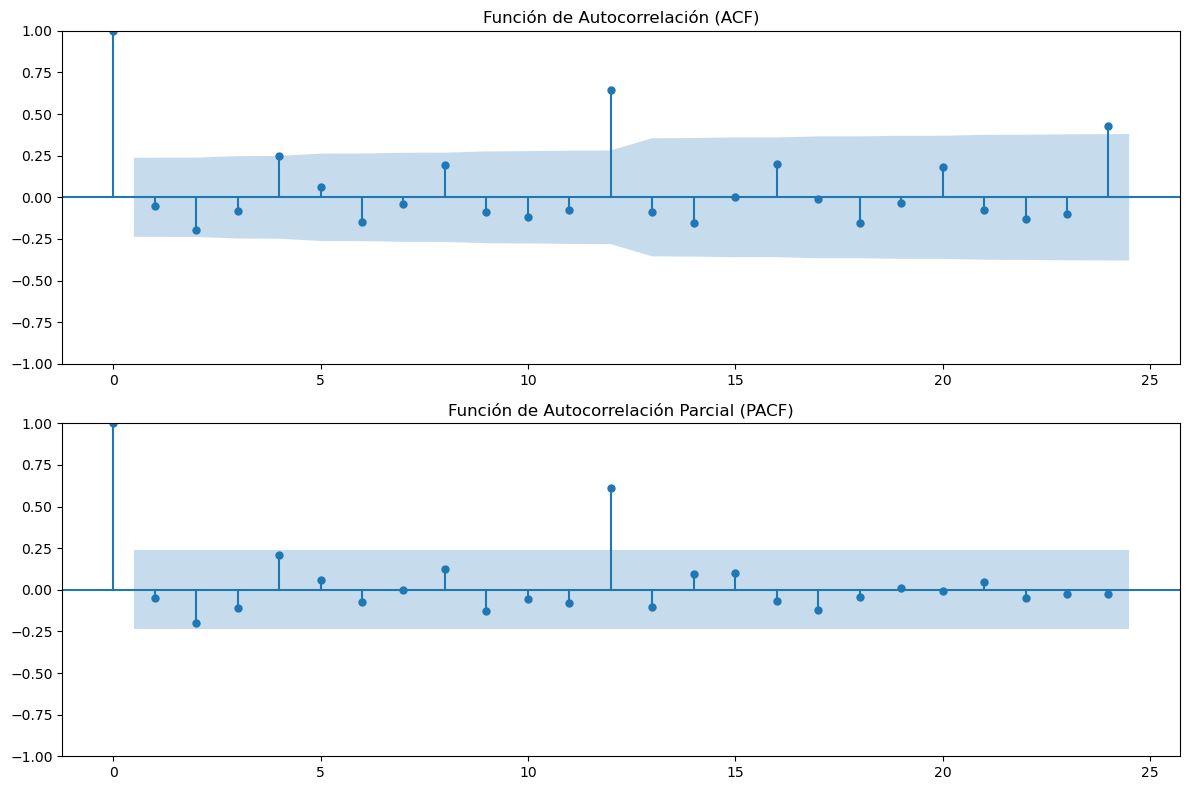

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar los datos del archivo .txt proporcionado
data = pd.read_excel(r'C:\Users\Juan Cabrera\Documents\ventasmensuales.xlsx')
data['Fechas'] = pd.to_datetime(data['Fechas'], format='%Y-%m')
data.set_index('Fechas', inplace=True)

# Convertir los ingresos a tipo numérico reemplazando comas por puntos
data['Ingresos'] = data['Ingresos'].replace(',', '.', regex=True).astype(float)

# 1. Serie temporal de ingresos
plt.figure(figsize=(12, 6))
plt.plot(data['Ingresos'], color='blue')
plt.title('Serie Temporal de Ingresos Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# 2. Gráfico de descomposición estacional
decomposition = seasonal_decompose(data['Ingresos'], model='additive', period=12)
decomposition.plot()
plt.suptitle('Descomposición de la Serie Temporal de Ingresos', y=1.05)
plt.show()

# 3. Histograma de ingresos
plt.figure(figsize=(10, 5))
plt.hist(data['Ingresos'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de los Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 4. Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(data['Ingresos'], lags=24, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')
plt.subplot(212)
plot_pacf(data['Ingresos'], lags=24, ax=plt.gca())
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()
